# COVID-19 Auswertung - DIVI

In [1]:
Programm_Name = "DIVI"

### Speicherorte und Dateinamen Plots

In [2]:
Laufwerk = "D:\\"
name_input = 'data-ovyiI.csv'
name_input3 = 'data-UIdqI.csv'
name_output_df = 'Dataframes\\df_divi2.csv'

pfad_output = "Github\\Auswertung_Covid_19\\output\\"
pfad_onedrive = "OneDrive\\Auswertung_Covid_19\\"
pfad_input = "Github\\Auswertung_Covid_19\\input\\"
name_performance = 'Dataframes\\df_performance.csv'

name_1_1 = "plot_1-1_cases_absolute numbers.png" # cases absoulte zahlen EU
name_1_2 = "plot_1-2_cases.png" # cases pro 100.000 Einwohner EU 
name_2 = "plot_2_intensiv.png" # intensiv Deutschland
name_2_2 = "plot_2_2_intensiv_gesamt.png" # intensiv Deutschland covid und nicht covid
name_2_3 = "plot_2_3_intensiv_covid-19.png" # intensiv Deutschland covid
name_2_4 = "plot_2_4_Belegte_Betten_intensiv_covid-19.png" # intensiv Deutschland covid
name_3_1 = "plot_3-1_deaths_absolute numbers.png" # deaths absolute zahlen EU
name_3_2 = "plot_3-2_deaths.png" # deaths pro 100.000 Einwohner EU
name_4_1 = "plot_4-1_cases_ger.png" # cases Deutschland
name_4_2 = "plot_4-2_deaths_ger.png" # deaths Deutschland
name_5 = "performance_dist_plot.png" # Performance Plot
name_6 = "plot_6_Positivenquote_ger.png" # Positivenquote
name_6_2 = "plot_6-2_Anzahl_Testungen_ger.png" # Anzahl Testungen
name_7 = "plot_7_Impfquote_ger.png" # Impfquote Deutschland Bundesländer
name_7_2 = "plot_7-2_Impfungen_Timeseries_ger.png" # Impfungen Timeseries Deutschland
name_7_3 = "plot_7-3_Impfungen_Timeseries_ger.png" # Impfungen Timeseries Deutschland

## import libraries

In [3]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
from matplotlib.ticker import FuncFormatter   # Numberformat plot ticks
import matplotlib.dates as mdates

# performance
from datetime import datetime, timedelta
from datetime import date # todays date

import os
now = datetime.now()

In [4]:
# Datum einstellen 
minticks = 14
maxticks = 14

# Preprocessing Dataframes

### Linien und Schriftgrößen

In [5]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 25

# output größe der bilder
h = 16*1
v = 9
dpi = 200

In [6]:
today = date.today().strftime("%d.%m.%Y")

## Datenimport

# Variablen für die Plots definieren

## Länder Farben

In [7]:
c_fr = '#f80d0d'    # rot
c_pl = '#25e5e5'    # cyan
c_isr = '#25e5e5'
c_ger = '#0721ff'   # dunkelblau
c_cz = '#bb8fce'    # lila
c_usa = '#bb8fce'
c_at = '#18c213'    # grün
c_rus = '#18c213'
c_se = '#18c213'
c_ch = '#000000'    # schwarz
c_ita = '#000000'
c_gb = '#faac2b'    # orange


In [8]:
# Lokal - CSV einlesen
### nur covid Intensivbelegungen
df_divi2 = pd.read_csv(Laufwerk + pfad_input + name_input)
df_divi2['date'] = pd.to_datetime(df_divi2.date, utc=True)
# df_divi2 = df_divi2.loc[df_divi2.date >= ts, :]


### covid und alle Intensivbelegungen
df_divi3 = pd.read_csv(Laufwerk + pfad_input + name_input3)
df_divi3['date'] = pd.to_datetime(df_divi2.date, utc=True)
df_divi3["limit"] = 4900


## preprocessing

### data (DIVI)

In [9]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [10]:
a = str(date.today().strftime("%Y-%m-%d"))
print(a)
tage = days_between(a, "2020-03-01")
print(tage)

2022-03-23
752


In [11]:
# ts_x = str(datetime.today() - timedelta(tage))
ts_x = str(datetime.today() - timedelta(tage))

In [12]:
# Zeit eingrenzen
# ts_x = str(datetime. today() - timedelta(140))
ts = pd.to_datetime(ts_x, utc=True)
df_divi2 = df_divi2.loc[df_divi2.date >= ts, :]

df_divi3 = df_divi3.loc[df_divi3.date >= ts, :]

print(ts)
print(datetime.today())
#df_divi2.head(1)

2020-03-01 22:56:58.382500+00:00
2022-03-23 22:56:58.401450


## Covid Belegungen

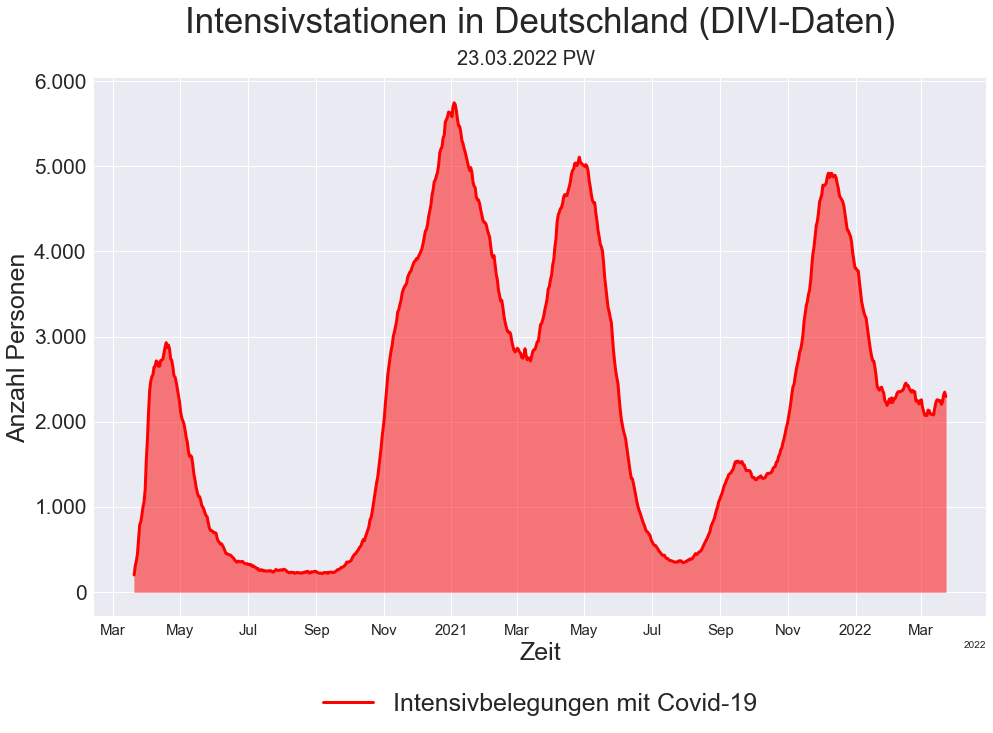

In [13]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
#plt.figure(figsize=(19,9))

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(h, v*1.1))

ax.yaxis.set_major_formatter(formatter)

plt.style.use('seaborn')
plt.grid(True)

#plt.plot(df_divi2.date,df_divi2['Belegte Betten'], color = 'blue', linewidth = lws, label = "nicht-Covid-19")
ax1 = plt.plot(df_divi2.date,df_divi2['COVID-19-Fälle'], color = 'red', linewidth = lws, label = "Intensivbelegungen mit Covid-19")


plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.1),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 0)
plt.yticks(fontsize=size -4)

# plt.xticks([])
plt.ylabel('Anzahl Personen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)
#plt.title('DIVI-Intensivregister (www.intensivregister.de)  \n Stand: ' + today, fontsize=size)

plt.title('Intensivstationen in Deutschland (DIVI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# fill area between 
plt.fill_between(df_divi2.date, df_divi2['COVID-19-Fälle'], color='red',alpha=0.5)
#plt.fill_between(df_divi2.date, df_divi2['COVID-19-Fälle'], df_divi2['Belegte Betten'], color='blue',alpha=0.5)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output + name_2_3, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive + name_2_3, dpi = dpi, bbox_inches='tight')

plt.show()

### Belegte Betten und Covid

In [14]:
df_divi3

,date,Belegte Betten,COVID-19-Fälle,limit
0,2020-03-20 11:15:00+00:00,576,200,4900
1,2020-03-21 11:15:00+00:00,2828,308,4900
2,2020-03-22 11:15:00+00:00,3255,364,4900
3,2020-03-23 11:15:00+00:00,3778,451,4900
4,2020-03-24 11:15:00+00:00,4856,616,4900
...,...,...,...,...
526,2021-08-28 10:15:00+00:00,18573,965,4900
527,2021-08-29 10:15:00+00:00,18298,1003,4900
528,2021-08-30 10:15:00+00:00,18493,1061,4900
529,2021-08-31 10:15:00+00:00,18893,1090,4900


In [15]:
# # Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# #plt.figure(figsize=(19,9))

# def y_axis_thousands(x, pos):
#    # 'The two args are the value and tick position'
#     return '{:0,d}'.format(int(x)).replace(",",".")
# formatter = FuncFormatter(y_axis_thousands)
# plt.style.use('seaborn')

# fig, ax = plt.subplots(figsize=(h, v*1.1))

# ax.yaxis.set_major_formatter(formatter)

# plt.style.use('seaborn')
# plt.grid(True)

# #plt.plot(df_divi2.date,df_divi2['Belegte Betten'], color = 'blue', linewidth = lws, label = "nicht-Covid-19")

# ax2 = plt.plot(df_divi3.date,df_divi3['Belegte Betten'], color = 'grey', linestyle="", 
#                marker='', linewidth = lws, label = "")

# ax1 = plt.plot(df_divi3.date,df_divi3['COVID-19-Fälle'], color = 'red', linewidth = lws, 
#                label = "")

# ax1 = plt.plot(df_divi3.date,df_divi3['COVID-19-Fälle'], color = 'black', linewidth = lws, 
#                label = "Belegte Betten\nmit Covid-19")

# ax3 = plt.plot(df_divi3.date,df_divi3['limit'], color = 'grey', linestyle="", linewidth = lws, label = "")




# # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation = 0)
# plt.yticks(fontsize=size -4)

# # plt.xticks([])
# plt.ylabel('Anzahl Personen', fontsize=size)
# plt.xlabel('Zeit', fontsize=size)
# #plt.title('DIVI-Intensivregister (www.intensivregister.de)  \n Stand: ' + today, fontsize=size)

# plt.title('Intensivstationen in Deutschland (DIVI-Daten)\n', fontsize=size+10)
# plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# # fill area between 
# plt.fill_between(df_divi3.date, df_divi3['Belegte Betten'], df_divi3['COVID-19-Fälle'] , color='blue',alpha=0.5,
#                 label="Belegte Betten\nnicht Covid-19",
#                 interpolate=True)

# # plt.fill_between(df_divi3.date, df_divi3['COVID-19-Fälle'], df_divi3['limit'] , color='red',alpha=0.5,
# #                 label="Covid-19 Fälle über\ngeschätzter Kapazitätsgrenze",
# #                 interpolate=True, where = df_divi3['COVID-19-Fälle'] > df_divi3["limit"])
# #plt.fill_between(df_divi2.date, df_divi2['COVID-19-Fälle'], df_divi2['Belegte Betten'], color='blue',alpha=0.5)

# plt.legend(loc='upper center', 
#            bbox_to_anchor=(0.5, -0.1),
#            fancybox=True, 
#            shadow=True, 
#            ncol=2, 
#            fontsize=size)

# locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
# formatter = mdates.ConciseDateFormatter(locator)
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(Laufwerk + pfad_output + name_2_4, dpi = dpi, bbox_inches='tight')
# plt.savefig(Laufwerk + pfad_onedrive + name_2_4, dpi = dpi, bbox_inches='tight')

# plt.show()

## dataframes speichern

In [16]:
df_divi2.to_csv(Laufwerk + pfad_output + name_output_df, index=False)

## Performance messen

In [17]:
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

# Laufzeit
x = now2 - now
x = round(x.total_seconds(),2)

print(f'performance {pc} = {x} seconds')

performance DOUG = 1.24 seconds
